In [11]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/scherala/LearningML/master/Data/heart.csv')
# Separate features
nominal_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
target_column = ['DEATH_EVENT']
numeric_features = set(heart_data.columns) - set(nominal_features) - set(target_column)
heart_data[numeric_features].describe()

,age,serum_creatinine,creatinine_phosphokinase,ejection_fraction,platelets,serum_sodium,time
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,1.39388,581.839465,38.083612,263358.029264,136.625418,130.260870
std,11.894809,1.03451,970.287881,11.834841,97804.236869,4.412477,77.614208
min,40.000000,0.50000,23.000000,14.000000,25100.000000,113.000000,4.000000
25%,51.000000,0.90000,116.500000,30.000000,212500.000000,134.000000,73.000000
50%,60.000000,1.10000,250.000000,38.000000,262000.000000,137.000000,115.000000
75%,70.000000,1.40000,582.000000,45.000000,303500.000000,140.000000,203.000000
max,95.000000,9.40000,7861.000000,80.000000,850000.000000,148.000000,285.000000


## Linear, Quadratic and Polynomial Transformations

#### Linear: sums, averages, rotations, translations

##### Quadratic Example:
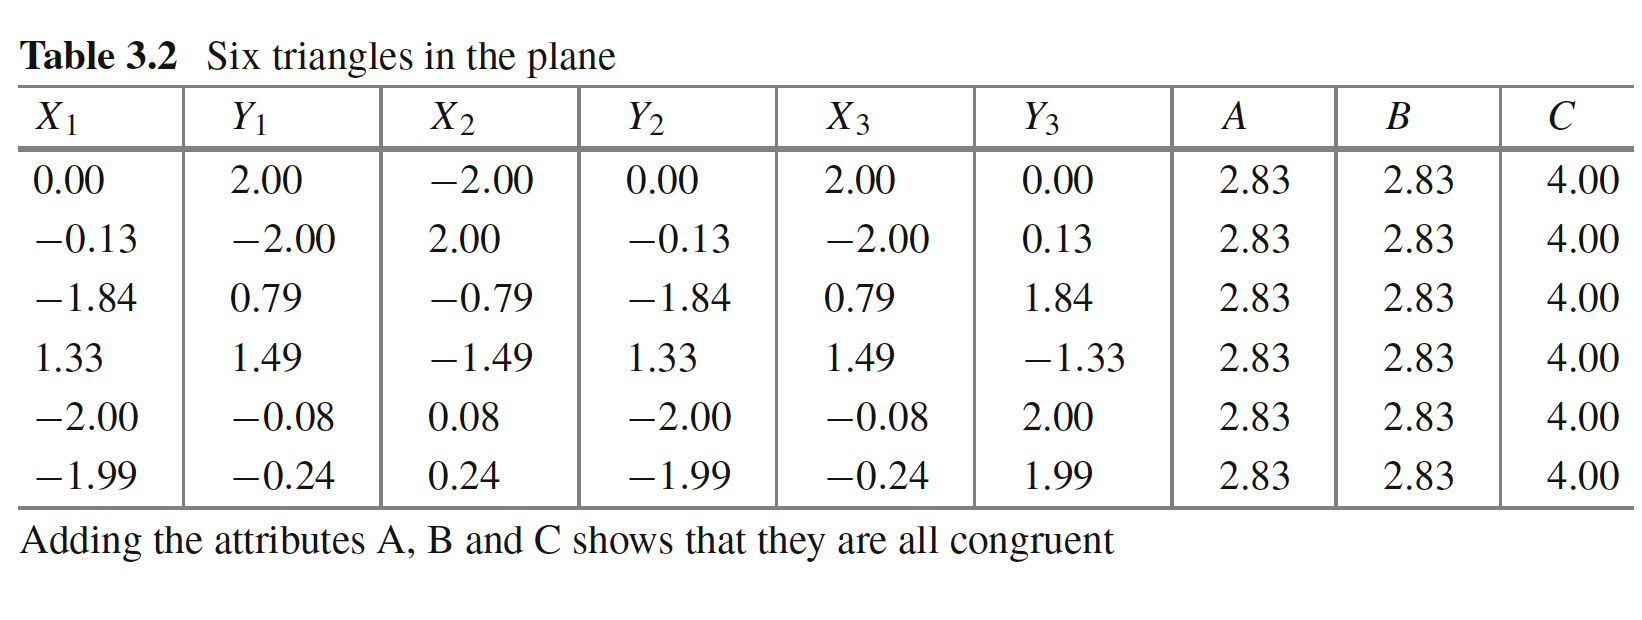

Ref: http://users.ece.utexas.edu/~ethomaz/courses/dm/papers/data-preprocessing-book.pdf

From this figure, it is evident that applying Z = (A22− 4A1A3) and forming this new variable would help us in classifying the data easily


#### Polynomial Example:

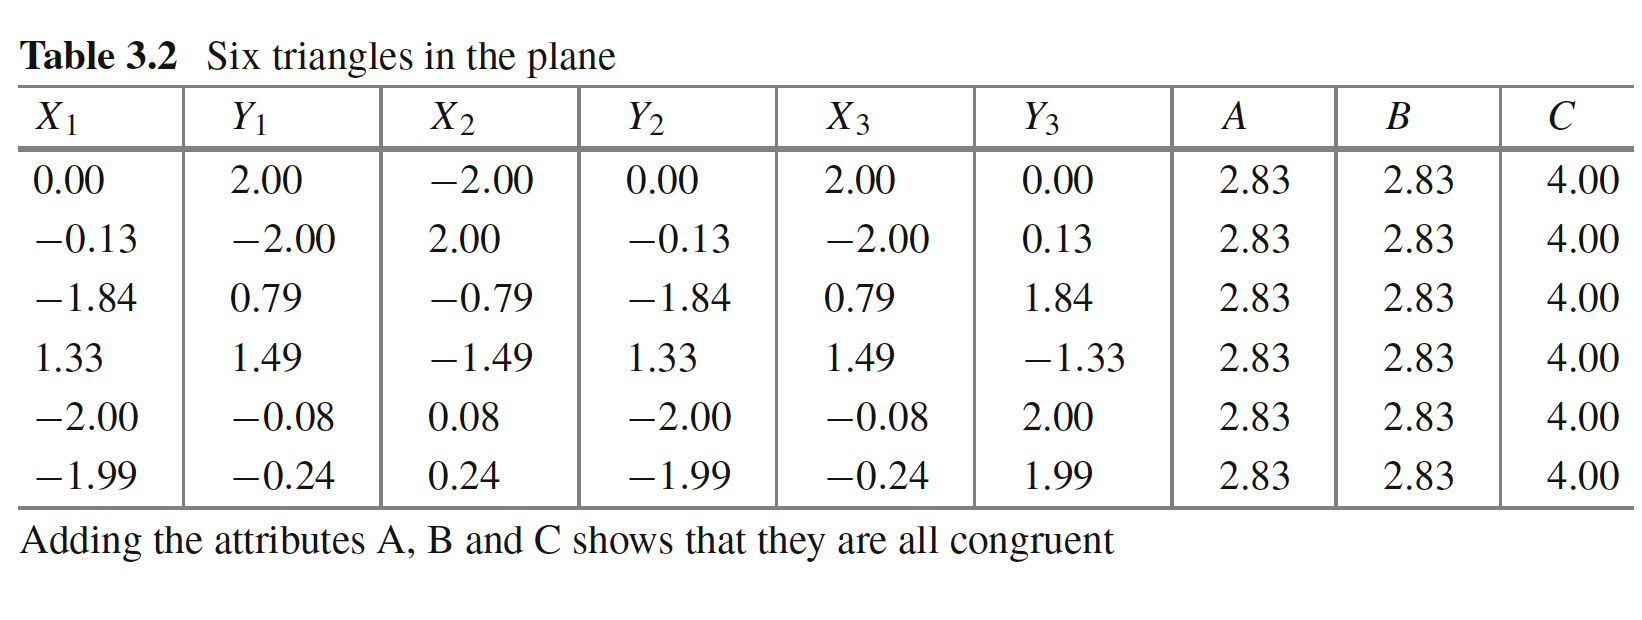

From this figure, it is evident that applying sqrt((X1 − X2)2 + (Y1 − Y2)2) and forming this new variable would help us in classifying the data easily

### Box-cox transformation

Notes: 
1. Understand if the data is guassian or not before applying transformation. How? Use histogram
2. Refer 3.5.7 of Book mentioned in readme.md for more information

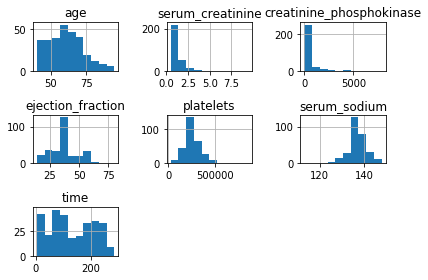

In [12]:
hist = heart_data[numeric_features].hist()
plt.tight_layout()
plt.show()

In [15]:
# From the above we observe that age, serum_creatinine, creatinine_phosphokinase are skewed and don't seem to follow guassian distribution

from sklearn.preprocessing import PowerTransformer

features_to_process = ['serum_creatinine', 'creatinine_phosphokinase', 'age']
pt = PowerTransformer()
transformed_data = pt.fit_transform(heart_data[features_to_process])


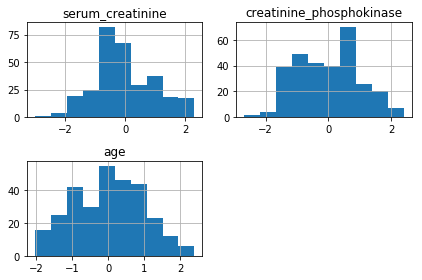

In [18]:
transformed_df = pd.DataFrame(transformed_data, columns = features_to_process)
hist_transform = transformed_df.hist()
plt.tight_layout()
plt.show()